# **Diebeties Analysis**

In [6]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Pregnancies are recorded in the dataset

In [11]:
pregnancies = df['Pregnancies'].count()
print('Total pregnancies recorded ',pregnancies)

Total pregnancies recorded  769


### The average glucose level among the individuals in the dataset

In [14]:
g_level = round(df['Glucose'].mean(), 3)
print('Average glucose level is ',g_level)

Average glucose level is  120.897


### The highest blood pressure recorded

In [15]:
h_blood_p = df['BloodPressure'].max()
print('Highest blood pressure recorded ',h_blood_p)

Highest blood pressure recorded  122


### The thinnest skin thickness recorded

In [17]:
t_skin = df['SkinThickness'].min()
print('Thinnest skin thickness is ',t_skin)

Thinnest skin thickness is  0


### The total insulin level across all entries

In [18]:
t_insullin_level = df['Insulin'].sum()
print('Total insullin level is ',t_insullin_level)

Total insullin level is  61287


### The average BMI (Body Mass Index) among the individuals in the dataset

In [19]:
bmi_avg = df['BMI'].mean()
print('Average BMI is ',bmi_avg)

Average BMI is  31.998179453836148


### The highest value of the diabetes pedigree function

In [20]:
h = df['DiabetesPedigreeFunction'].max()
print('Highest values of diabetes pedigree function is ',h)

Highest values of diabetes pedigree function is  2.42


### The age of the oldest individual in the dataset

In [21]:
o_age = df['Age'].max()
print('Age of oldest member is ',o_age)

Age of oldest member is  81


### How many cases in the dataset are diagnosed as diabetic?

In [31]:
diagnosed = df[df['Outcome'] == 1].shape[0]
print('Total patients diagnosed as diabetic ',diagnosed)

Total patients diagnosed as diabetic  269


### How many cases in the dataset are not diagnosed as diabetic?

In [32]:
n_diagnosed = df[df['Outcome'] == 0].shape[0]
print('Total patients diagnosed as not diabetic ',n_diagnosed)

Total patients diagnosed as not diabetic  500


### The median value of glucose levels in the dataset

In [35]:
m = df['Glucose'].median()
print('The median value of glucose levels ',m)

The median value of glucose levels  117.0


### The individual with the lowest BMI and their corresponding attributes

In [38]:
df[df['BMI'] == df['BMI'].min()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


### Among individuals diagnosed as diabetic, what is the average number of pregnancies?

In [45]:
df[df['Outcome'] == 1]['Pregnancies'].mean().__round__(2)

4.85

### Is there any correlation between blood pressure and age in the dataset?

In [49]:
df['Age'].corr(df['BloodPressure'])

0.23995031661453625

### Are there any outliers in the insulin levels? If so, how would you handle them?

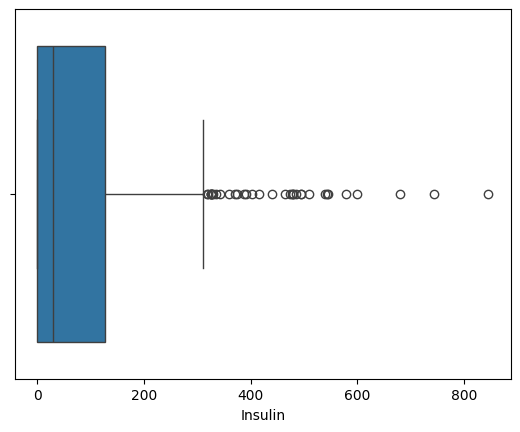

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Insulin'],orient='y')
plt.show()

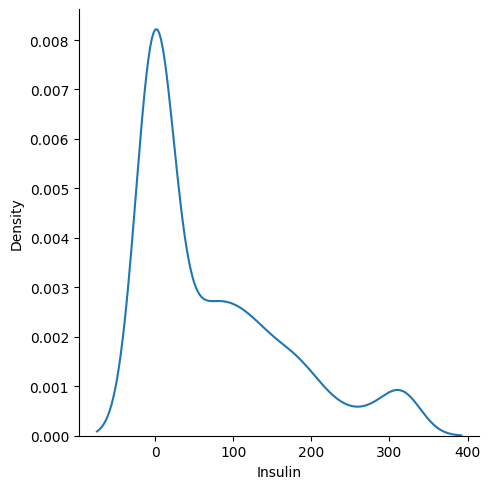

In [57]:
sns.displot(df['Insulin'],kind='kde')
plt.show()

In [52]:
IQR = df['Insulin'].quantile(0.75) - df['Insulin'].quantile(0.25)

In [53]:
minimum = df['Insulin'].quantile(0.25) - (1.5 * IQR)
maximum = df['Insulin'].quantile(0.75) + (1.5 * IQR)

In [54]:
df['Insulin'] = np.where(df['Insulin'] < minimum,
                        minimum,
                        np.where(df['Insulin'] > maximum,
                                maximum,
                                df['Insulin']))

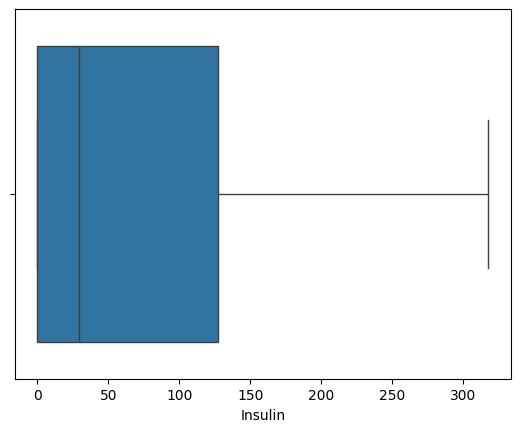

In [55]:
sns.boxplot(df['Insulin'],orient='y')
plt.show()

### Can you identify any patterns between skin thickness and BMI?

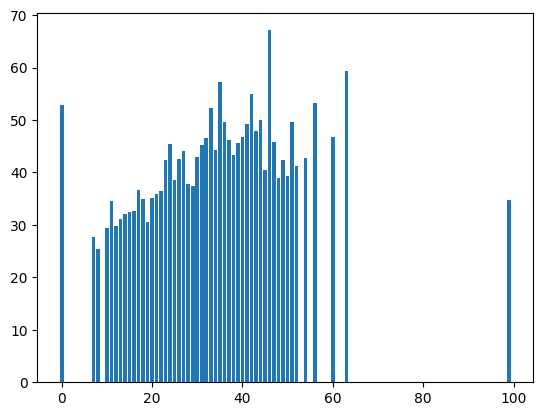

In [60]:
plt.bar(df['SkinThickness'], df['BMI'])
plt.show()

### How does the diabetes pedigree function vary across different age groups?

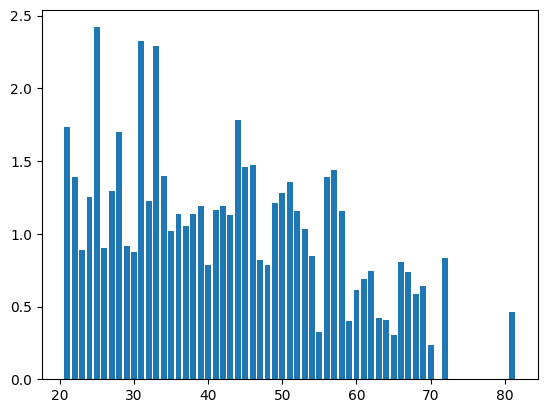

In [66]:
plt.bar(df['Age'], df['DiabetesPedigreeFunction'])
plt.show()